### This Jupyter notebook is to show how pyUSCRN works.

#### Brief introduction to install pyUSCRN package.
--------------------------------------------

> python setup.py install

or

> python setup.py develop

> python -c "import pyUSCRN as pu; pu.intro()"

You will see:

```
################################################################################
Name: pyUSCRN
A python package to deal with the data from USCRN
Author: Kang Wang
University of Colorado Boulder
URL: https://github.com/wk1984/pyUSCRN/
################################################################################
```

#### Step 1: Import the packages we need.

In [1]:
import glob, os, datetime
import numpy as np
import matplotlib.pyplot as plt
import pyUSCRN as pu

#### Step 2: Select stations

In this case, we use a shape file ("Miss_RiverBasin/Miss_RiverBasin.shp") to define the region of interested.

We also plot the selected stations with an overlap layer of this shape file.

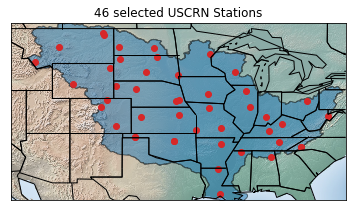

In [6]:
pu.initialize()
shpfile = "Miss_RiverBasin/Miss_RiverBasin.shp"
stn_list = pu.filter_stations(CONUS=True, shp={'filename':shpfile})
pu.plot_map_selected_stations(overlap={'filename':shpfile})

In [7]:
stn_header, data = pu.read_merge_sites_for_single_variable(stn_list.ID, 
                                                           DATES=['2015-01-01','2016-12-31'],
                                                           VARS = ['T_MONTHLY_AVG'],
                                              scale = 'monthly')

merging (46) stations............................................DONE


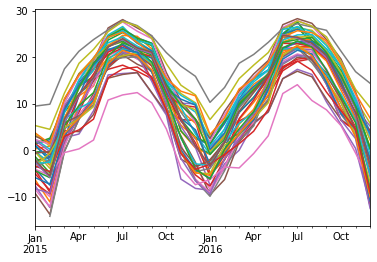

In [8]:
data.plot(legend=False)

In [10]:
pu.convert_to_ILAMB_benchmark_monthly(stn_header, data, 'tas.nc')